# RYTHM DATA CHALLENGE : HYPNOGRAMME ET EEG

## I. Importation des données

- 1) Importation des librairies
- 2) Importation des données et visualisation

## II. Hypnogramme

- 1) Visualisation des hypnogrammes
- 2) Pourcentages des types (type={-1,0,1,2,3,4})
- 3) Rapport du nombre de types
- 4) Matrice de transitions des types
- 5) Longueur des phases pour chaque type
- 6) Décomposition de l'hypnogramme par type de phase
- 7) Les k phases dominantes (k fixé)
- 8) Violence du sommeil
- 9) Hypnogramme par bloc
- 10) Nombre de phases par type et nombre de phases par hypnogramme
- 11) Temps d'endormissement
- 12) Durée du sommeil (court ou long dormeur, seuil fixé)
- 13) Longueur moyennes des phases par type

## III. EEG

- 1) Visualisation du signal EEG
- 2) Calcul de la moyenne et de la variance des EEG
- 3) Calcul de l'entropie
- 4) Coefficients de Fourrier, moyenne et variance, skew et kurtosis
- 5) Périodogramme sur les coefficients de Fourrier, moyenne
- 6) Signal Welch sur Fourrier
- 7) Transformation en ondelettes, coefficients, moyenne, variance, skew et kurtosis
- 8) Pisarenko Harmonic Decomposition
- 9) Signal Filt Filt, moyenne et variance

## IV. Création de features

- 1) Features sur l'hypnogramme
- 2) Features sur les EEG
- 3) Concaténation des features et normalisation

## V. Valeurs aberrantes

- 1) Liste des âges par indice
- 2) Ages qui se répètent le plus (plus de 15 fois)
- 3) Boites à moustache : Région de confiance à 95%
- 4) Suppression des valeurs aberrantes (seuil à 0.15)

## VI. Tests

- 1) Définition de la métrique
- 2) Random Forest
- 3) Gradiant Boosting
- 4) XGBoost

## VII. Soumission

## I. Importation des données

1) Importation des librairies


In [1]:
# some imports

#figures
#from figures import visualize_tree, plot_tree_interactive
# numpy
import numpy as np
# pandas
import pandas as pd
import matplotlib.pyplot as plt
import math
import cmath
import scipy.signal as sg
import xgboost as xgb
%matplotlib inline
from scipy import fftpack
from scipy.fftpack import fft, ifft
from scipy import stats as st
import math
import cmath
import scipy.signal as sg
#import pyeeg
import pywt
import sklearn as sk

2) Importation des données et visualisation

In [2]:
df_X_train = pd.read_csv('train_input.csv', sep=';')
df_X_test  = pd.read_csv('test_input.csv', sep=';')
df_y_train = pd.read_csv('challenge_output_data_training_file_age_prediction_from_eeg_signals.csv', sep=';')

In [3]:
df_X_train.shape
df_X_test.shape
df_y_train.shape
n_train = df_X_train.shape[0]
print('Number of samples in train set: %s' % n_train)
print('Length of the test set: %s' % df_X_test.shape[0])

#concat=pd.concat([df_X_train, df_y_train], axis=1)

Number of samples in train set: 581
Length of the test set: 249


In [4]:
df_X_all = pd.concat([df_X_train, df_X_test])
df_X_all.reset_index(inplace=True)
print('Number of individuals: %s' % df_X_all.shape[0])
print('Number of raw features: %s' % df_X_all.shape[1])

Number of individuals: 830
Number of raw features: 75004


In [5]:
features = ['EEG_%s'% i for i in range(0, 75000)]
#df_X_all[features].shape
df_X_numerical = pd.get_dummies(df_X_all[features])

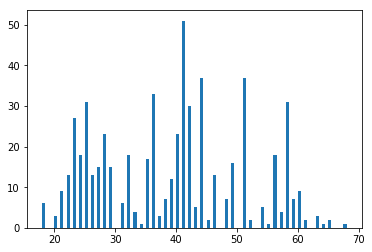

18 68


In [173]:
plt.hist(df_y_train['TARGET'], bins=100)
plt.show()
print(np.amin(df_y_train['TARGET']), np.amax(df_y_train['TARGET']))

- Dix ensembles de cinq ans d'intervalles
- Fréquence : 250 Hz

Data description 

The data contains two types of information :
- Variables 'EEG' : a continuous 5min period of EEG signal during deep sleep.
- Variables 'HYPNOGRAM': list of variable length corresponding to the hypnogram associated to the deep sleep EEG sample given. The values are 0 (for Wake), 1 (for N1), 2 (N2), 3 (Deep sleep - N3), 4 (REM), -1 (when scoring was not possible).

## II. Hypnogramme

1) Visualisation des hypnogrammes

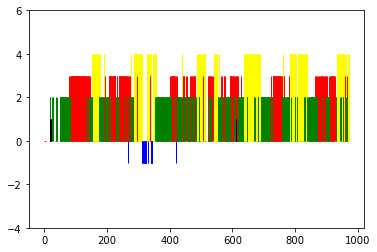

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  2,  2,  1,  0,  0,  0,  0,  2,  0,  2,  2,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  2,  0,  0,  0,  2,  0,  0,  0,  0,  0,  0,  1,  1,
        1,  2,  1,  2,  2,  2,  2,  0,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  2,  2,  3,  2,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  2,  2,  3,  3,  3,  2,  0,  0,  2,  3,  2,  2,  2,  2,  2,  2,
        4,  2,  4,  2,  4,  4,  2,  4,  4,  4,  4,  2,  4,  4,  4,  4,  4,
        4,  2,  4,  4,  2,  2,  2,  2,  4,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  4,  2,  2,  2,  3,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  3,  3,  3,  3,  2,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3

In [7]:
HYP=df_X_all['HYPNOGRAM']
def Hypno(k,plot):
    A=HYP[k]
    B=list(A)
    for i in range(len(A)):
        if A[i] in ['0','1','2','3','4','-']:
            B[i]=A[i]
        else:
            B[i]=5    
    for i in range(len(B)):
        if B[i]=='-':
            B[i]=7
            B[i+1]=5    
    B=[int(j) for j in B]
    B = [x for x in B if x!= 5]
    for i in range(len(B)):
        if B[i]==7:
            B[i]=-1
    #B= [x for x in B if x != -1]
    if(plot=='TRUE'):        
        plt.ylim([-4, 6])    
        for i in range(len(B)):
            if(B[i]==-1):
                plt.bar(i,B[i],width=0.35, edgecolor='blue')
            if(B[i]==0):
                plt.bar(i,B[i],width=0.35, edgecolor='red')
            if(B[i]==1):
                plt.bar(i,B[i],width=0.35, edgecolor='black')
            if(B[i]==2):
                plt.bar(i,B[i],width=0.35, edgecolor='green')
            if(B[i]==3):
                plt.bar(i,B[i],width=0.35, edgecolor='red')
            if(B[i]==4):
                plt.bar(i,B[i],width=0.35, edgecolor='yellow')
        plt.show()  
    
    return(np.asarray(B))
Hypno(0,'TRUE')

In [8]:
matrix_Hypno=list()
for i in range(0,len(df_X_all)):
    matrix_Hypno.append(Hypno(i,'FALSE'))

2) Pourcentages des types (type={-1,0,1,2,3,4})

In [9]:
def pourcentage_hypno(X,k):
    b=0
    for i in range(0,len(X)):
        if(X[i]==k):
            b=b+1
    return(b/len(X))

#pourcentage_hypno(Hypno(764,'FALSE'),4)

In [10]:
matrix_pourcentage_hypno=np.zeros([len(df_X_all),6])
for i in range(0,len(matrix_pourcentage_hypno)):
        matrix_pourcentage_hypno[i,0]=pourcentage_hypno(matrix_Hypno[i],-1)
        matrix_pourcentage_hypno[i,1]=pourcentage_hypno(matrix_Hypno[i],0)
        matrix_pourcentage_hypno[i,2]=pourcentage_hypno(matrix_Hypno[i],1)
        matrix_pourcentage_hypno[i,3]=pourcentage_hypno(matrix_Hypno[i],2)
        matrix_pourcentage_hypno[i,4]=pourcentage_hypno(matrix_Hypno[i],3)
        matrix_pourcentage_hypno[i,5]=pourcentage_hypno(matrix_Hypno[i],4)

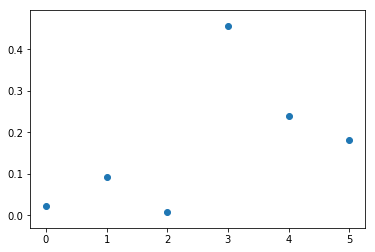

In [11]:
    
    plt.scatter(range(0,len(matrix_pourcentage_hypno[0,:])),matrix_pourcentage_hypno[0,:])

3) Rapport du nombre de types

In [12]:
def matrix_rapport_de_phase_i(i):
    matrix_rapport=np.zeros([6,6])
    d=matrix_pourcentage_hypno
    
    for k in range(0,5):
        for j in range(0,5):
            if(d[i,j]==0):
                d[i,j]=1000
                    
            matrix_rapport[k,j]=d[i,k]/d[i,j]
            
    return(matrix_rapport)

In [13]:
List_rapport=list()
for i in range(0,len(df_X_all)):
    List_rapport.append(matrix_rapport_de_phase_i(i))

In [14]:
matrix_rapport_de_phase=np.zeros([len(df_X_all),15])

for i in range(0,len(df_X_all)):
    matrix_rapport_de_phase[i,0]=List_rapport[i][0,1]
    matrix_rapport_de_phase[i,1]=List_rapport[i][0,2]
    matrix_rapport_de_phase[i,2]=List_rapport[i][0,3]
    matrix_rapport_de_phase[i,3]=List_rapport[i][0,4]
    matrix_rapport_de_phase[i,4]=List_rapport[i][0,5]
    matrix_rapport_de_phase[i,5]=List_rapport[i][1,2]
    matrix_rapport_de_phase[i,6]=List_rapport[i][1,3]
    matrix_rapport_de_phase[i,7]=List_rapport[i][1,4]
    matrix_rapport_de_phase[i,8]=List_rapport[i][1,5]
    matrix_rapport_de_phase[i,9]=List_rapport[i][2,3]
    matrix_rapport_de_phase[i,10]=List_rapport[i][2,4]
    matrix_rapport_de_phase[i,11]=List_rapport[i][2,5]
    matrix_rapport_de_phase[i,12]=List_rapport[i][3,4]
    matrix_rapport_de_phase[i,13]=List_rapport[i][3,5]
    matrix_rapport_de_phase[i,14]=List_rapport[i][4,5]

4) Matrice de transitions des types

In [15]:
def changement_hypno(A):
    B=np.zeros([len(A),2])
    j=0
    for i in range(0,len(A)-1):
        B[j,0]=A[i]
        B[j,1]=A[i+1]
        j=j+1
        
    C=list()
    for j in range(-1,5):
        for k in range(-1,5):
            a=0
            for i in range(0,len(A)):        
                if((B[i,0]==j)&(B[i,1]==k)):
                    a=a+1
            C.append(a)
    mat=np.zeros([6,6])

    for j in range(-1,5):
        for k in range(-1,5):
            for i in range(0,len(A)):
                if((B[i,0]==j)&(B[i,1]==k)):
                    mat[j+1,k+1]=mat[j+1,k+1]+1
    a=np.eye(len(mat))*np.diag(mat)
    return (np.asarray(C),(mat-a).reshape(1,-1),mat-a)
#A=Hypno(0,'FALSE')
#changement_hypno(A)[0:3]
#np.sum(changement_hypno(A)[2],axis=1)

In [16]:
def nombre_de_changement_de_phase_par_type(A):
    liste=np.zeros(6)
    for i in range(0,6):
        liste[i]=np.sum(changement_hypno(A)[2],axis=1)[i]
    return(liste)
print(nombre_de_changement_de_phase_par_type(Hypno(3,'FALSE')))

[   2.   30.    3.  113.   44.   91.]


5) Longueur des phases pour chaque type

In [17]:
def Longueur_Des_Phases(H):
    D=list()
    i=0
    while(i<len(H)-1):
        a=1
        while((H[i]==H[i+1])&(i<len(H)-2)):
            a=a+1
            i=i+1
        i=i+1
        D.append(a)
    return np.asarray(D)
#print(max(Longueur_Des_Phases(Hypno(2,'FALSE'))))
#len(Hypno(2,'FALSE'))

6) Décomposition de l'hypnogramme par type de phase

In [18]:
def Type_Phases(D,H):
    S=np.zeros(len(D))
    for i in range(0,len(D)):
        S[i]=H[sum(D[0:i])]
    return(S)
#Type_Phases(Longueur_Des_Phases(Hypno(2,'FALSE')),Hypno(2,'FALSE'))

7) Les k phases dominantes (k fixé)

In [19]:
k=5
def Dix_Phases_Dominantes(D,S):
    R=list()
    i=0
    A=np.sort(D)[len(D)-k:len(D)]
    for i in range(0,len(A)):
        for j in range(0,len(D)):
            if(A[i]==D[j]):
                a=S[j]        
        R.append(a)
    return(np.asarray(R))
#Dix_Phases_Dominantes(Longueur_Des_Phases(Hypno(17,'FALSE')),Type_Phases(Longueur_Des_Phases(Hypno(17,'FALSE')),Hypno(17,'FALSE')))

In [20]:
matrix_Dix_Phases_Dominantes_hypno=np.zeros([len(df_X_all),k])
for i in range(0,len(matrix_Dix_Phases_Dominantes_hypno)):
    B=matrix_Hypno[i]
    A=Longueur_Des_Phases(B)
    matrix_Dix_Phases_Dominantes_hypno[i,:]=Dix_Phases_Dominantes(A,Type_Phases(A,B))
#matrix_Dix_Phases_Dominantes_hypno

In [21]:
#Matrice des longueurs des k phases dominantes
matrix_Long_Des_Dix_Phases_Dominantes=np.zeros([len(df_X_all),k])
for i in range(0,len(df_X_all)):
        matrix_Long_Des_Dix_Phases_Dominantes[i,:]=np.sort(Longueur_Des_Phases(matrix_Hypno[i]))[
                                                        len(Longueur_Des_Phases(matrix_Hypno[i]))-k:
                                                        len(Longueur_Des_Phases(matrix_Hypno[i]))]
#matrix_Long_Des_Dix_Phases_Dominantes

8) Violence du sommeil

In [22]:
def violence_du_sommeil(i):
    A=matrix_Hypno[i]
    lis=changement_hypno(A)[0]
    violence=np.zeros([6])
    
    violence[0]=lis[0]+lis[7]+lis[14]+lis[21]+lis[28]+lis[35]
    violence[1]=lis[1]+lis[6]+lis[8]+lis[13]+lis[15]+lis[20]+lis[22]+lis[27]+lis[29]+lis[34]
    violence[2]=lis[2]+lis[9]+lis[12]+lis[16]+lis[19]+lis[23]+lis[26]+lis[33]
    violence[3]=lis[3]+lis[10]+lis[17]+lis[18]+lis[25]+lis[32]
    violence[4]=lis[4]+lis[11]+lis[24]+lis[31]
    violence[5]=lis[5]+lis[30]
    
    violence = violence/len(A)
    return(violence)

In [23]:
matrice_violence=np.zeros([len(df_X_all),6])

for i in range(0,len(df_X_all)):
    matrice_violence[i,:]=violence_du_sommeil(i)

9) Hypnogramme par bloc

In [24]:
def phases_with_index(H):
    return(np.concatenate(([Type_Phases(Longueur_Des_Phases(H),H)],[Longueur_Des_Phases(H)]),axis=0))

#phases_with_index(Hypno(765,'FALSE')) #Première ligne Hyp, 2eme longueur de la phase

In [25]:
#On efface les pics i.e lorsqu'il y a un pic dans une phase

def hypno_par_bloc(index,plot):
    P=phases_with_index(Hypno(index,'FALSE'))
    L=int(np.size(P)/len(P))
    j=0
    
    for i in range(0,L):
        if (P[1,i]!=1):
            j=j+1

    P2=np.zeros([2,j+1])
    P2[0,j]=-2
    P2[1,j]=-2
    j=0
    
    for i in range(0,L):
        if (P[1,i]!=1):
            P2[:,j]=P[:,i]
            j=j+1

    k=0
    for i in range(0,j):
        if(P2[0,i]!=P2[0,i+1]):
            k=k+1

    RES=np.zeros([2,k+1])
    RES[0,k]=-2
    RES[1,k]=-2
    
    i=0
    a=0
    while ((i<j)&(a<k+1)):
        RES[0,a]=P2[0,i]
        s=P2[1,i]
        while ((P2[0,i]==P2[0,i+1]) & (i<j)):
            s=s+P2[1,i+1]
            i=i+1
        RES[1,a]=s
        i=i+1
        a=a+1

    H_test=np.zeros(int(sum(RES[1,:])))
    plt.ylim([-4, 6])

    H_test[0:int(RES[1,0])]=RES[0,0]
    somme=RES[1,0]
    for m in range(1,k):
    
        H_test[int(somme):int(somme+RES[1,m])]=RES[0,m]
        somme=somme+RES[1,m]
    
    if (plot=='TRUE'):
        
        B=H_test
        for i in range(len(B)):
            if(B[i]==-1):
                plt.bar(i,B[i],width=0.35, edgecolor='blue')
            if(B[i]==0):
                plt.bar(i,B[i],width=0.35, edgecolor='red')
            if(B[i]==1):
                plt.bar(i,B[i],width=0.35, edgecolor='black')
            if(B[i]==2):
                plt.bar(i,B[i],width=0.35, edgecolor='green')
            if(B[i]==3):
                plt.bar(i,B[i],width=0.35, edgecolor='red')
            if(B[i]==4):
                plt.bar(i,B[i],width=0.35, edgecolor='yellow')  
        plt.show()
    
    return(np.asarray(H_test))

#hypno_par_bloc(9,'TRUE')

10) Nombre de phases par type et nombre de phases par hypnogramme

In [26]:
def Nombre_de_Phases_par_Type(i):
    TP=Type_Phases(Longueur_Des_Phases(matrix_Hypno[i]),matrix_Hypno[i])
    return np.array([len(TP[TP==-1]),len(TP[TP==0]),len(TP[TP==1]),len(TP[TP==2]),len(TP[TP==3]),len(TP[TP==4])])
#Nombre_de_Phases_par_Type(0)

In [27]:
matrix_Nombre_de_Phases_par_Type=np.zeros([len(df_X_all),6])
for i in range(0,len(df_X_all)):
    matrix_Nombre_de_Phases_par_Type[i,:]=Nombre_de_Phases_par_Type(i)
#matrix_Nombre_de_Phases_par_Type

In [28]:
matrix_Nombre_de_Phases=np.zeros([len(df_X_all),1])

for i in range(0,len(df_X_all)):
    matrix_Nombre_de_Phases[i,:]=sum(matrix_Nombre_de_Phases_par_Type[i,:])
    
matrix_Nombre_de_Phases=np.asarray(matrix_Nombre_de_Phases).reshape(1,-1)[0]
#matrix_Nombre_de_Phases

11) Temps d'endormissement

In [29]:
def temps_endormissement(i):
    A=hypno_par_bloc(i,'FALSE')
    t=0
    while (A[t]==0):
        t=t+1
    return(t)

#temps_endormissement(82)

12) Durée du sommeil (court ou long dormeur, seuil fixé)

In [30]:
def court_dormeur(i,time):
    A=matrix_Hypno[i]
    m=1
    if (len(A)<=time):
        m=0
    
    return(m)

#court_dormeur(82,800)

13) Longueur moyennes des phases par type

In [31]:
def longueur_moyenne_phase_par_type_hypno(index):    
    P=phases_with_index(matrix_Hypno[index])
    L=int(np.size(P)/len(P))
    j=0   
    for i in range(0,L):
        if (P[1,i]!=1):
            j=j+1
    P2=np.zeros([2,j+1])
    P2[0,j]=-2
    P2[1,j]=-2
    j=0
    for i in range(0,L):
        if (P[1,i]!=1):
            P2[:,j]=P[:,i]
            j=j+1
    k=0
    for i in range(0,j):
        if(P2[0,i]!=P2[0,i+1]):
            k=k+1
    RES=np.zeros([2,k+1])
    RES[0,k]=-2
    RES[1,k]=-2
    i=0
    a=0
    while ((i<j)&(a<k+1)):
        RES[0,a]=P2[0,i]
        s=P2[1,i]
        while ((P2[0,i]==P2[0,i+1]) & (i<j)):
            s=s+P2[1,i+1]
            i=i+1
        RES[1,a]=s
        i=i+1
        a=a+1
    long=np.zeros([2,6])
    for j in range(-1,5):
        long[0,j+1]=j
        c=0
        s=0
        for i in range(0,RES.shape[1]-1):
            if (RES[0,i]==j):
                c=c+1
                s=s+RES[1,i]
            if (c==0):
                long[1,j+1]=0
            if (c!=0):
                long[1,j+1]=s/c
    return(long)

#longueur_moyenne_phase_par_type_hypno(85)

## III. EEG

1) Visualisation du signal EEG

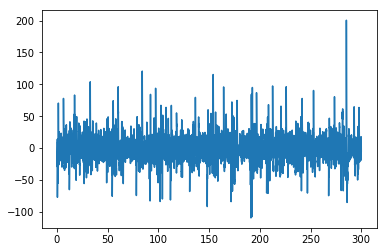

In [32]:
Xnum=np.asarray(df_X_numerical)
Xnum.shape

Y=np.linspace(0,300,75000)
Y.shape

X=np.array(df_X_numerical.ix[568])
plt.plot(Y,X)
plt.show()

2) Calcul de la moyenne et de la variance des EEG

In [33]:
#calcul de la moyenne des EEG pour chaque sujet
means=[]
for i in range(830):
    means.append(np.mean(Xnum[i,:]))
means=np.asmatrix(means)
#means
#means.shape

In [34]:
#calcul de la variance des EEG pour chaque sujet
variance=[]
for i in range(830):
    variance.append(np.var(Xnum[i,:]))
variance=np.asmatrix(variance)
#variance
#variance.shape

3) Calcul de l'entropie

In [35]:
#calcul de l'entropy des EEG pour chaque sujet
entropy=[]
for i in range(830):
    entropy.append(st.entropy(Xnum[i,:]))
entropy=np.asmatrix(entropy)
#entropy=entropy.astype(double)
#entropy tous egaux a -inf

4) Coefficients de Fourrier, moyenne et variance, skew et kurtosis

In [36]:
Fourrier = fft(Xnum).real
Fourrier = np.asmatrix(Fourrier)
#Fourrier
#Fourrier.shape

In [37]:
#calcul de la moyenne des fourrier pour chaque sujet
moyenne_Fourrier=[]
for i in range(830):
    moyenne_Fourrier.append(np.mean(Fourrier[i,:]))
moyenne_Fourrier=np.asmatrix(moyenne_Fourrier)
#means
#moyenne_Fourrier.shape

In [38]:
#calcul de la variance des Fourrier pour chaque sujet
variance_Fourrier=[]
for i in range(830):
    variance_Fourrier.append(np.var(Fourrier[i,:]))
variance_Fourrier=np.asmatrix(variance_Fourrier)
#variance
#variance_Fourrier.shape

In [39]:
from scipy import stats
#from stats import skew, kurtosis
skw_Fourrier=stats.skew(Fourrier, axis=1)
#from stats import skew, kurtosis
kur_Fourrier=stats.kurtosis(Fourrier, axis=1)

5) Périodogramme sur les coefficients de Fourrier, moyenne

In [40]:
from scipy import signal
f, Pxx_den = signal.periodogram(Fourrier)

In [41]:
#calcul de la moyenne des fourrier pour chaque sujet
moyenne_PS2=[]
for i in range(830):
    moyenne_PS2.append(np.mean(Pxx_den[i,:]))
moyenne_PS2=np.asmatrix(moyenne_PS2)
#moyenne_PS2
moyenne_PS2.shape

(1, 830)

6) Signal Welch sur Fourrier

In [42]:
'''
fs, ps = signal.welch(Fourrier)
'''

'\nfs, ps = signal.welch(Fourrier)\n'

In [43]:
ps=pd.read_csv('ps',sep=' ',header=None)
ps=np.asarray(ps)

In [44]:

#calcul de la moyenne des fourrier pour chaque sujet
moyenne_PS1=[]
for i in range(830):
    moyenne_PS1.append(np.mean(ps[i,:]))
moyenne_PS1=np.asmatrix(moyenne_PS1)
#moyenne_PS1
moyenne_PS1.shape


(1, 830)

7) Transformation en ondelettes, coefficients, moyenne, variance, skew et kurtosis

In [45]:
cA, cD = pywt.dwt(Xnum, 'db1')

In [46]:
#calcul de la moyenne des wavelets pour chaque sujet
moyenne_wA=[]
for i in range(830):
    moyenne_wA.append(np.mean(cA[i,:]))
moyenne_wA=np.asmatrix(moyenne_wA)
#moyenne_wA
moyenne_wA.shape

#calcul de la moyenne des wavelets pour chaque sujet
moyenne_wD=[]
for i in range(830):
    moyenne_wD.append(np.mean(cD[i,:]))
moyenne_wD=np.asmatrix(moyenne_wD)
#moyenne_wD
moyenne_wD.shape

(1, 830)

In [47]:
#calcul de la variance des wavelets pour chaque sujet
var_wA=[]
for i in range(830):
    var_wA.append(np.var(cA[i,:]))
var_wA=np.asmatrix(var_wA)
#moyenne_wA
var_wA.shape

#calcul de la variance des wavelets pour chaque sujet
var_wD=[]
for i in range(830):
    var_wD.append(np.var(cD[i,:]))
var_wD=np.asmatrix(var_wD)
#moyenne_wD
var_wD.shape

(1, 830)

In [48]:
skw_cA=stats.skew(cA, axis=1)
kur_cA=stats.kurtosis(cA, axis=1)
skw_cD=stats.skew(cD, axis=1)
kur_cD=stats.kurtosis(cD, axis=1)

8) Pisarenko Harmonic Decomposition

In [49]:
def covariance(x, k):
    N = len(x) - k
    return (x[:-k] * x[k:]).sum() / N

def phd1(x):
    """Estimate frequency using Pisarenko Harmonic Decomposition"""
    r1 = covariance(x, 1)
    r2 = covariance(x, 2)
    a = (r2 + np.sqrt(r2 ** 2 + 8 * r1 ** 2)) / 4 / r1
    if a > 1:
        a = 1
    elif a < -1:
        a = -1
    return np.arccos(a)
freq=[]
for i in range(0,830):
    freq.append(phd1(Xnum[i,:]))
freq = np.asmatrix(freq)

9) Signal Filt Filt, moyenne et variance

In [50]:
b, a = signal.butter(3, 0.05)
z1 = signal.filtfilt(b, a, Fourrier)

b, a = signal.butter(3, 0.05)
z2 = signal.filtfilt(b, a, moyenne_Fourrier)

b, a = signal.butter(3, 0.05)
z3 = signal.filtfilt(b, a, moyenne_PS2)

b, a = signal.butter(3, 0.05)
z4 = signal.filtfilt(b, a, moyenne_PS1)

b, a = signal.butter(3, 0.05)
z5 = signal.filtfilt(b, a, cD)

b, a = signal.butter(3, 0.05)
z6 = signal.filtfilt(b, a, cA)

b, a = signal.butter(3, 0.05)
z7 = signal.filtfilt(b, a, freq)

b, a = signal.butter(3, 0.05)
z8 = signal.filtfilt(b, a, means)

b, a = signal.butter(3, 0.05)
z9 = signal.filtfilt(b, a, variance)

In [51]:
#calcul de la moyenne des wavelets pour chaque sujet
moyenne_wAF=[]
for i in range(830):
    moyenne_wAF.append(np.mean(z6[i,:]))
moyenne_wAF=np.asmatrix(moyenne_wAF)
#moyenne_wA
moyenne_wAF.shape

#calcul de la moyenne des wavelets pour chaque sujet
moyenne_wDF=[]
for i in range(830):
    moyenne_wDF.append(np.mean(z5[i,:]))
moyenne_wDF=np.asmatrix(moyenne_wDF)
#moyenne_wA
moyenne_wDF.shape

(1, 830)

In [52]:
#calcul de la moyenne des wavelets pour chaque sujet
var_wAF=[]
for i in range(830):
    var_wAF.append(np.var(z6[i,:]))
var_wAF=np.asmatrix(var_wAF)
#moyenne_wA
#var_wAF.shape

#calcul de la moyenne des wavelets pour chaque sujet
var_wDF=[]
for i in range(830):
    var_wDF.append(np.var(z5[i,:]))
var_wDF=np.asmatrix(var_wDF)
#moyenne_wA
#var_wDF.shape

In [53]:
#sur fourrier filtré
#calcul de la moyenne des wavelets pour chaque sujet
moyenne_FF=[]
for i in range(830):
    moyenne_FF.append(np.mean(z1[i,:]))
moyenne_FF=np.asmatrix(moyenne_FF)
#moyenne_wA
moyenne_FF.shape

#calcul de la moyenne des wavelets pour chaque sujet
var_FF=[]
for i in range(830):
    var_FF.append(np.var(z1[i,:]))
var_FF=np.asmatrix(var_FF)
#moyenne_wA
var_FF.shape

skw_FF=stats.skew(z1, axis=1)
kur_FF=stats.kurtosis(z1, axis=1)

In [54]:
skw_cAF=stats.skew(z6, axis=1)
kur_cAF=stats.kurtosis(z6, axis=1)
skw_cDF=stats.skew(z5, axis=1)
kur_cDF=stats.kurtosis(z5, axis=1)

In [55]:
z2=z2.reshape(-1,1)
z3=z3.reshape(-1,1)
z4=z4.reshape(-1,1)
z7=z7.reshape(-1,1)
z8=z8.reshape(-1,1)
z9=z9.reshape(-1,1)

kur_Fourrier=np.asmatrix(kur_Fourrier)
kur_Fourrier=kur_Fourrier.reshape(-1,1)
skw_Fourrier=np.asmatrix(skw_Fourrier)
skw_Fourrier=skw_Fourrier.reshape(-1,1)

kur_FF=np.asmatrix(kur_FF)
kur_FF=kur_FF.reshape(-1,1)
skw_FF=np.asmatrix(skw_FF)
skw_FF=skw_FF.reshape(-1,1)

kur_cA=np.asmatrix(kur_cA)
kur_cA=kur_cA.reshape(-1,1)
skw_cA=np.asmatrix(skw_cA)
skw_cA=skw_cA.reshape(-1,1)

kur_cD=np.asmatrix(kur_cD)
kur_cD=kur_cD.reshape(-1,1)
skw_cD=np.asmatrix(skw_cD)
skw_cD=skw_cD.reshape(-1,1)

kur_cAF=np.asmatrix(kur_cAF)
kur_cAF=kur_cAF.reshape(-1,1)
skw_cAF=np.asmatrix(skw_cAF)
skw_cAF=skw_cAF.reshape(-1,1)

kur_cDF=np.asmatrix(kur_cDF)
kur_cDF=kur_cDF.reshape(-1,1)
skw_cDF=np.asmatrix(skw_cDF)
skw_cDF=skw_cDF.reshape(-1,1)

moyenne_wA=moyenne_wA.reshape(-1,1)
moyenne_wD=moyenne_wD.reshape(-1,1)
moyenne_wAF=moyenne_wAF.reshape(-1,1)
moyenne_wDF=moyenne_wDF.reshape(-1,1)
var_wA=var_wA.reshape(-1,1)
var_wD=var_wD.reshape(-1,1)
var_wAF=var_wAF.reshape(-1,1)
var_wDF=var_wDF.reshape(-1,1)

#z10=z10.reshape(-1,1)
#z11=z11.reshape(-1,1)
variance_Fourrier=variance_Fourrier.reshape(-1,1)
moyenne_Fourrier=moyenne_Fourrier.reshape(-1,1)
moyenne_FF=moyenne_FF.reshape(-1,1)
var_FF=var_FF.reshape(-1,1)

8) Filtres Series temp: http://statsmodels.sourceforge.net/stable/tsa.html

In [33]:
from statsmodels import tsa
from statsmodels.tsa import stattools, ar_model, filters
from statsmodels.tsa.filters import bk_filter, filtertools, hp_filter, cf_filter

a) Baxter-King bandpass filter

In [168]:
filtre_bk=filters.bk_filter.bkfilter(Xnum)

In [169]:
m_bk=np.mean(filtre_bk,axis=1)
v_bk=np.var(filtre_bk,axis=1)
kur_bk=stats.kurtosis(filtre_bk, axis=1)
skw_bk=stats.skew(filtre_bk, axis=1)

In [181]:
filtre_bk.shape

(806, 75000)

b) Autoregressive, or recursive, filtering.

In [34]:
filtre_rec=np.zeros(Xnum.shape)
for i in range(0,len(Fourrier)):
    filtre_rec[i,:]=filters.filtertools.recursive_filter(Xnum[i,:],1)

In [35]:
m_rec=np.mean(filtre_rec,axis=1)
v_rec=np.var(filtre_rec,axis=1)
kur_rec=stats.kurtosis(filtre_rec, axis=1)
skw_rec=stats.skew(filtre_rec, axis=1)

In [36]:
filtre_rec_F=np.zeros(Fourrier.shape)
for i in range(0,len(Fourrier)):
    filtre_rec_F[i,:]=filters.filtertools.recursive_filter(Fourrier[i,:],1)

In [37]:
m_rec_F=np.mean(filtre_rec_F,axis=1)
v_rec_F=np.var(filtre_rec_F,axis=1)
kur_rec_F=stats.kurtosis(filtre_rec_F, axis=1)
skw_rec_F=stats.skew(filtre_rec_F, axis=1)

c) Hodrick-Prescott filter (cycle & trend)

In [38]:
filtre_hp1=filters.hp_filter.hpfilter(Xnum)[0]

In [39]:
m_hp1=np.mean(filtre_hp1,axis=1)
v_hp1=np.var(filtre_hp1,axis=1)
kur_hp1=stats.kurtosis(filtre_hp1, axis=1)
skw_hp1=stats.skew(filtre_hp1, axis=1)

In [40]:
filtre_hp2=filters.hp_filter.hpfilter(Xnum)[1]

In [41]:
m_hp2=np.mean(filtre_hp2,axis=1)
v_hp2=np.var(filtre_hp2,axis=1)
kur_hp2=stats.kurtosis(filtre_hp2, axis=1)
skw_hp2=stats.skew(filtre_hp2, axis=1)

In [42]:
filtre_hp1_F=filters.hp_filter.hpfilter(Fourrier)[0]

In [43]:
m_hp1_F=np.mean(filtre_hp1_F,axis=1)
v_hp1_F=np.var(filtre_hp1_F,axis=1)
kur_hp1_F=stats.kurtosis(filtre_hp1_F, axis=1)
skw_hp1_F=stats.skew(filtre_hp1_F, axis=1)

In [51]:
filtre_hp2_F=filters.hp_filter.hpfilter(Fourrier)[1]

In [55]:
m_hp2_F=np.mean(filtre_hp2_F,axis=1)
v_hp2_F=np.var(filtre_hp2_F,axis=1)
kur_hp2_F=stats.kurtosis(filtre_hp2_F, axis=1)
skw_hp2_F=stats.skew(filtre_hp2_F, axis=1)

d) Christiano Fitzgerald asymmetric, random walk filter

In [149]:
filtre_cf1=filters.cf_filter.cffilter(Xnum)[0]

In [155]:
m_cf1=np.mean(filtre_cf1,axis=1)
v_cf1=np.var(filtre_cf1,axis=1)
kur_cf1=stats.kurtosis(filtre_cf1, axis=1)
skw_cf1=stats.skew(filtre_cf1, axis=1)

In [148]:
filtre_cf2=filters.cf_filter.cffilter(Xnum)[1]

In [156]:
m_cf2=np.mean(filtre_cf2,axis=1)
v_cf2=np.var(filtre_cf2,axis=1)
kur_cf2=stats.kurtosis(filtre_cf2, axis=1)
skw_cf2=stats.skew(filtre_cf2, axis=1)

In [144]:
filtre_cf1_F=filters.cf_filter.cffilter(Fourrier)[0]

In [157]:
m_cf1_F=np.mean(filtre_cf1_F,axis=1)
v_cf1_F=np.var(filtre_cf1_F,axis=1)
kur_cf1_F=stats.kurtosis(filtre_cf1_F, axis=1)
skw_cf1_F=stats.skew(filtre_cf1_F, axis=1)

In [145]:
filtre_cf2_F=filters.cf_filter.cffilter(Fourrier)[1]

In [158]:
m_cf2_F=np.mean(filtre_cf2_F,axis=1)
v_cf2_F=np.var(filtre_cf2_F,axis=1)
kur_cf2_F=stats.kurtosis(filtre_cf2_F, axis=1)
skw_cf2_F=stats.skew(filtre_cf2_F, axis=1)

In [154]:
#Vecteur des filtres 
m_filtre=np.concatenate((m_rec.reshape(-1,1) ,m_rec_F.reshape(-1,1),
                  m_hp1.reshape(-1,1), m_hp1_F.reshape(-1,1), m_hp2.reshape(-1,1),
                  m_hp2_F.reshape(-1,1), m_cf1.reshape(-1,1), m_cf1_F.reshape(-1,1),
                  m_cf2.reshape(-1,1), m_cf2_F.reshape(-1,1)), axis=1)

v_filtre=np.concatenate((v_rec.reshape(-1,1) ,v_rec_F.reshape(-1,1),
                  v_hp1.reshape(-1,1), v_hp1_F.reshape(-1,1), v_hp2.reshape(-1,1),
                  v_hp2_F.reshape(-1,1), v_cf1.reshape(-1,1), v_cf1_F.reshape(-1,1),
                  v_cf2.reshape(-1,1), v_cf2_F.reshape(-1,1)), axis=1)

kur_filtre=np.concatenate((kur_rec.reshape(-1,1) ,kur_rec_F.reshape(-1,1),
                  kur_hp1.reshape(-1,1), kur_hp1_F.reshape(-1,1), kur_hp2.reshape(-1,1),
                  kur_hp2_F.reshape(-1,1), kur_cf1.reshape(-1,1), kur_cf1_F.reshape(-1,1),
                  kur_cf2.reshape(-1,1), kur_cf2_F.reshape(-1,1)), axis=1)

skw_filtre=np.concatenate((skw_rec.reshape(-1,1) ,skw_rec_F.reshape(-1,1),
                  skw_hp1.reshape(-1,1), skw_hp1_F.reshape(-1,1), skw_hp2.reshape(-1,1),
                  skw_hp2_F.reshape(-1,1), skw_cf1.reshape(-1,1), skw_cf1_F.reshape(-1,1),
                  skw_cf2.reshape(-1,1), skw_cf2_F.reshape(-1,1)), axis=1)




NameError: name 'm_cf1_F' is not defined

In [155]:
#Vecteur des filtres 
m_filtre=np.concatenate((m_rec_F.reshape(-1,1),
                  m_hp1_F.reshape(-1,1),
                  m_hp2_F.reshape(-1,1)), axis=1)

v_filtre=np.concatenate((v_rec_F.reshape(-1,1),
                   v_hp1_F.reshape(-1,1), 
                  v_hp2_F.reshape(-1,1)), axis=1)

kur_filtre=np.concatenate((kur_rec_F.reshape(-1,1),
                   kur_hp1_F.reshape(-1,1), 
                  kur_hp2_F.reshape(-1,1)), axis=1)

skw_filtre=np.concatenate((skw_rec_F.reshape(-1,1),
                   skw_hp1_F.reshape(-1,1), 
                  skw_hp2_F.reshape(-1,1)), axis=1)

In [156]:
new_filtre=np.concatenate((m_filtre, v_filtre, kur_filtre, skw_filtre), axis=1)
new_filtre.shape

(830, 12)

## IV. Création de features

- 1) Features sur l'hypnogramme

In [56]:
#We construct the features

def feature(y):
    
    feature=np.zeros([y,4+36+6])
    feature1=np.zeros([y,36])     # 36 Proba de transition
    feature2=np.zeros([y])        # Longueur de l'hypnogramme 
    feature3=np.zeros([y])        # Nombre de changement
    feature4=np.zeros([y])        # Nombre de changement de la phase 3
    feature5=np.zeros([y])        # Taille de la plus longue séquence en pourcentage
    feature6=np.zeros([y,6])      # Pourcentage de phase
     
    for i in range(0,y):
        A=matrix_Hypno[i]
        feature1[i,:]=(changement_hypno(A)[0]/sum(changement_hypno(A)[0]))
        feature2[i]=len(A)
        feature3[i]=sum(sum(changement_hypno(A)[1]))
        feature4[i]=nombre_de_changement_de_phase_par_type(A)[3]
        feature5[i]=max(Longueur_Des_Phases(A))/len(A)
        feature6[i,:]=matrix_pourcentage_hypno[i,:]
    
    feature[:,0:36]=feature1
    feature[:,36]=feature2
    feature[:,37]=feature3
    feature[:,38]=feature4
    feature[:,39]=feature5
    feature[:,40:46]=feature6
    
    return(feature)
f=feature(830)

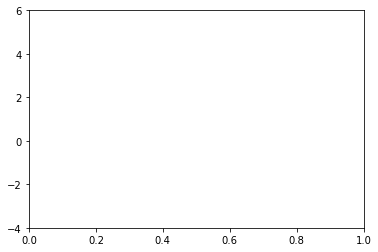

In [59]:
#On retire les 2 features les moins inffluents d'après le RF

f2= f
f2= np.delete(f2, (12), axis=1)
f2= np.delete(f2, (2), axis=1)

#On rajoute le temps d'endormissement en pourcentage du temps de sommeil comme feature

fe=np.zeros([len(f),f.shape[1]+1])
fe[:,0:f.shape[1]]=f

for i in range(0,len(f)):
    fe[i,f.shape[1]]=temps_endormissement(i)/len(hypno_par_bloc(i,'FALSE'))
    
fe.shape

#On rajoute la longueur moyenne des phases de chaque type

fl=np.zeros([len(f),f.shape[1]+6])
fl[:,0:f.shape[1]]=f
for i in range(0,len(f)):
    fl[i,f.shape[1]:fl.shape[1]]=longueur_moyenne_phase_par_type_hypno(i)[1]
    
#On rajoute un feature qualitatif du sommeil

fd=np.zeros([len(f),f.shape[1]+1])
fd[:,0:f.shape[1]]=f
for i in range(0,len(f)):
    fd[i,f.shape[1]]=court_dormeur(i,850)

In [60]:
features_hypno = np.concatenate((fe, matrice_violence, matrix_rapport_de_phase), axis=1) #on concatene tous les features
features_hypno.shape

(830, 68)

2) Features sur les EEG

In [61]:
features_EEG = np.concatenate((z2,z3,z4,z7,z8,z9,skw_Fourrier,kur_Fourrier,moyenne_wA,moyenne_wD,
                           var_wA,var_wD,moyenne_wAF,moyenne_wDF,var_wAF,
                           var_wDF,moyenne_FF,var_FF,skw_FF,skw_cA,skw_cA,skw_cAF,skw_cD,skw_cDF,
                            kur_FF,kur_cA,kur_cAF,kur_cD,kur_cDF),axis=1)

features_EEG.shape

(830, 29)

In [62]:
features_device=np.asarray(df_X_all['DEVICE']).reshape(-1,1)

3) Concaténation des features et normalisation

In [63]:
total2 = np.concatenate((features_device,features_hypno, features_EEG), axis=1) #on concatene tous les features

In [64]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()

normal_total2 = scaler.fit_transform(total2)
normal_total2.shape

(830, 98)

(array([ 508.,  235.,   58.,   15.,    5.,    1.,    3.,    3.,    0.,    2.]),
 array([ 0.        ,  0.03300971,  0.06601942,  0.09902913,  0.13203883,
         0.16504854,  0.19805825,  0.23106796,  0.26407767,  0.29708738,
         0.33009709]),
 <a list of 10 Patch objects>)

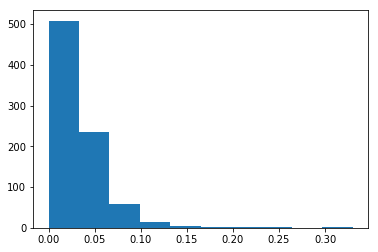

In [65]:
plt.hist(total2[:,47])

## V. Valeurs aberrantes

1) Liste des âges par indice

In [127]:
def hypno_par_age(y,B):
    L1=range(0,len(B))
    L1=np.asarray(L1)
    L1=L1[(B>=y)&(B<y+1)]
    return L1


def list_hypno_par_age(B):
    list_hypno_par_age=list()
    for i in range(np.amin(df_y_train['TARGET']),np.amax(df_y_train['TARGET'])+1):
        list_hypno_par_age.append(hypno_par_age(i,B))
    #for i in range(np.amin(df_y_train['TARGET']),np.amax(df_y_train['TARGET'])+1):
     #   print(i,'    ',list_hypno_par_age[i-18])
    return(list_hypno_par_age)

def liste_indices_ages_croissant(B):
    liste_indices_ages_croissant=hypno_par_age(18,B)
    for i in range(19,len(list_hypno_par_age(B))+18):
        liste_indices_ages_croissant=np.concatenate((liste_indices_ages_croissant,hypno_par_age(i,B)),axis=0)
    return(liste_indices_ages_croissant)

list_hypno_par_age(B)
liste_indices_ages_croissant(B)

array([ 26,  81, 180, 387, 441, 479, 305, 539, 543,  82, 186, 247, 271,
       294, 408, 462, 497, 503,  37, 133, 202, 215, 345, 356, 358, 377,
       412, 450, 499, 506, 536,  16,  24,  52,  71,  86,  91, 106, 111,
       206, 210, 214, 245, 248, 269, 334, 336, 359, 362, 384, 400, 415,
       420, 442, 480, 508, 518, 525,  42,  58,  89, 100, 109, 281, 286,
       287, 320, 340, 350, 354, 393, 452, 465, 495, 566, 579,  13,  40,
        53,  63,  78,  88,  99, 105, 107, 135, 140, 148, 151, 152, 212,
       272, 280, 300, 308, 317, 318, 346, 364, 407, 425, 504, 505, 524,
       545, 550, 577,  49, 130, 145, 149, 168, 261, 270, 299, 410, 433,
       490, 515, 546,  33,  43,  77,  83, 158, 191, 219, 229, 279, 307,
       316, 321, 366, 444, 493,  44,  79,  90, 103, 123, 153, 165, 167,
       171, 182, 218, 226, 277, 288, 292, 315, 372, 383, 416, 423, 438,
       533, 552,   1,  35,  92, 195, 246, 253, 259, 289, 332, 397, 463,
       464, 473, 520, 551,  17,  28, 200, 265, 365, 418,   0,  2

2) Ages qui se répètent le plus (plus de 15 fois)

In [134]:
B=np.asarray(df_y_train['TARGET'])
L=list()
M=list()
for i in range(0,51):
    if(len(list_hypno_par_age(B)[i])>15):
        L.append(i)
    if(len(list_hypno_par_age(B)[i])==1):
        M.append(i)
L=np.asarray(L)
#M=np.asarray(M)
L

array([ 5,  6,  7, 10, 14, 17, 18, 22, 23, 24, 26, 31, 33, 38, 40])

In [129]:
La=list()
for i in range(0,len(M)):
    La.append(list_hypno_par_age(B)[M[i]])
La=np.asmatrix(np.asarray(La).reshape(1,-1)[0]) 
La.shape

(1, 4)

3) Boites à moustache : Région de confiance à 95%

In [135]:
w=np.zeros(normal_total2.shape)
for i in range(0,len(L)):
    mat=np.zeros([len(list_hypno_par_age(B)[L[i]]),normal_total2.shape[1]])
    mat=normal_total2[list_hypno_par_age(B)[L[i]]]
    moy=np.mean(mat,axis=0)
    for k in range(0,normal_total2.shape[1]):
        premf=mat[:,k]
        c=abs(premf-moy[k])
        a=np.argsort(c)
        b=list_hypno_par_age(B)[L[i]][a]
        d=b[int(0.95*len(list_hypno_par_age(B)[L[i]][a])):]
        w[d,k]=1

4) Suppression des valeurs aberrantes (seuil à 0.15)

In [136]:
Lb1=np.asarray(range(0,830))
Lb1=Lb1[np.sum(w,axis=1)/normal_total2.shape[1]>0.175]
Lb1

array([  2,  11,  12,  31, 105, 111, 162, 172, 179, 197, 212, 218, 269,
       274, 295, 300, 372, 383, 401, 428, 526, 531, 552, 568])

In [132]:
Lb=np.concatenate((La,np.asmatrix(Lb1)),axis=1)
Lb=np.asarray(np.sort(Lb))
Lb

array([[  2,  11,  12,  31, 105, 111, 162, 172, 179, 197, 201, 212, 218,
        269, 274, 295, 298, 300, 310, 372, 383, 401, 428, 526, 529, 531,
        552, 568]])

In [137]:
ValAbb1=np.delete(normal_total2, Lb1 , axis=0)
y=np.asarray(df_y_train['TARGET'])
age=np.delete(y, Lb1 , axis=0)

In [152]:
np.asarray(range(np.min(y),np.max(y)))

array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67])

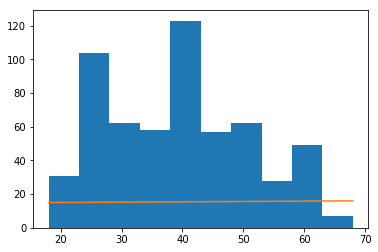

In [156]:
plt.hist(y)
plt.plot(np.asarray(range(np.min(y),np.max(y)+1)),np.asarray(np.linspace(15,16,51)))

## VI. Test

1) Définition de la métrique

In [77]:
#Loss function

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

2) Random Forest

In [167]:
from sklearn.ensemble import RandomForestRegressor

def test_random_forest(f,y,importance,y_train):
    forest = RandomForestRegressor(n_estimators=500, criterion='mse', max_depth=None, 
                                min_samples_split=2, min_samples_leaf=1, max_features='auto', max_leaf_nodes=None,
                                bootstrap=True, oob_score=True)
    # apprentissage
    forest = forest.fit(f[0:y],y_train[0:y])
    y_train_chap = forest.predict(f[0:y])
    y_chap = forest.predict(f[y:len(y_train)])
    
    if (importance=='TRUE'):
        plt.plot(forest.feature_importances_)
        plt.show()

    return(mean_absolute_percentage_error(y_train[y:581], 0.93*y_chap),mean_absolute_percentage_error(y_train[0:y], 0.93*y_train_chap))
test_random_forest(normal_total2,360,'FALSE',y)

(21.425493851503905, 9.153767579719494)

3) Gradient Boosting

In [168]:
from sklearn import ensemble
import pylab as pl


def test_gradient_boosting(f,y,importance,diagnose,y_train):
    GB=ensemble.GradientBoostingRegressor(loss='ls', learning_rate=0.091,
                                           n_estimators=100,subsample=1.0, min_samples_split=2, 
                                           min_samples_leaf=1, max_depth=3,init=None, random_state=None,max_features=None, 
                                           alpha=0.9, verbose=False,max_leaf_nodes=None, warm_start=False)
    GB = GB.fit(f[0:y],y_train[0:y]) 
    y_train_chap = GB.predict(f[0:y])
    y_chap = GB.predict(f[y:len(y_train)])
    
    if (diagnose=='TRUE'):
        X_test=f[y:len(y_train)]
        y_test=y_train[y:len(y_train)]
        y_pred=GB.predict(f[y:len(y_train)])
        params=GB.get_params()
        
        test_score = np.zeros((params['n_estimators'],), dtype=np.float64)
    
        for i, y_pred in enumerate(GB.staged_decision_function(X_test)):
            test_score[i] = GB.loss_(y_test, y_pred)
        
        pl.figure(figsize=(12, 9))
        pl.title('Deviance')
        pl.plot(np.arange(params['n_estimators']) + 1, GB.train_score_, 'b-', label='Training Set Deviance')
        pl.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',label='Test Set Deviance')
        pl.legend(loc='upper right')
        pl.xlabel('Boosting Iterations')
        pl.ylabel('Deviance')
        pl.show()
        
    if (importance=='TRUE'):
        feature_importance = GB.feature_importances_
        # make importances relative to max importance
        feature_importance = 100.0 * (feature_importance / feature_importance.max())
        sorted_idx = np.argsort(feature_importance)
        pos = np.arange(sorted_idx.shape[0]) + .5
        plt.subplot(1, 2, 2)
        plt.barh(pos, feature_importance[sorted_idx], align='center')
        plt.yticks(pos, sorted_idx)
        plt.xlabel('Relative Importance')
        plt.title('Variable Importance')
        plt.show()

    return(mean_absolute_percentage_error(y_train[y:len(y_train)], 0.93*y_chap),
           mean_absolute_percentage_error(y_train[0:y], 0.93*y_train_chap))
minimum=100
for i in range(310,390):
    x=test_gradient_boosting(normal_total2,i,'TR','TR',y)[0]
    if x<minimum:
        minimum=x
        a=i
print(minimum,a)

20.5924252891 388


In [158]:
model = ensemble.GradientBoostingRegressor()
model.fit(normal_total2[:388],df_y_train['TARGET'][:388])

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)

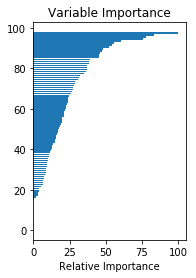

In [159]:
feature_importance = model.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
#plt.yticks(pos, boston.feature_names[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

4) XGBoost

In [80]:
def xgboost_f2(f,y,n,eta,maxdepth):


    dtrain = xgb.DMatrix(f[0:n,], y[0:n])
    dtest = xgb.DMatrix(f[n:len(y),], y[n:len(y)])

    watchlist  = [(dtest,'eval'), (dtrain,'train')]

    # specify parameters via map
    param = {'max_depth':maxdepth, 'eta':eta, 'silent':1, 'objective':'reg:gamma'}
    num_round = 1000
    param['nthread'] = 7
    param['eval_metric'] = 'rmse'

    bst = xgb.train(param, dtrain, num_round, watchlist, early_stopping_rounds=10,verbose_eval=False)
    # make prediction
    preds = bst.predict(dtest,ntree_limit=bst.best_ntree_limit)
    
    #print(mean_absolute_percentage_error(y[n:581], 0.95*preds))
    
    return(preds,mean_absolute_percentage_error(y[n:len(y)], 0.95*preds))

In [90]:
def test_param_xgb(f,y,debut_n,fin_n,step):
    
    if ((fin_n-debut_n)%step!=0):
        return("Le pas n'est pas bon")
    
    ypred=np.zeros([(fin_n-debut_n)+1,len(f)-len(y)])
    res=np.zeros([int((fin_n-debut_n)/step)+1,4])
    
    for n in range(debut_n,fin_n+1,step):
        
        res[int((n-debut_n)/step),0]=n
   
        a=xgboost_f2(f,y,n,(1/10),1)[1]
        s=0.1
        z=1
        
        for i in range(1,10):
            for j in range(1,10):
                b=xgboost_f2(f,y,n,(i/10),j)[1]
                if(b<a):
                    a=b
                    s=i/10
                    z=j
        res[int((n-debut_n)/step),1:4]=[a,s,z]

        print(res[int((n-debut_n)/step),])
        
        dtrain = xgb.DMatrix(f[0:n,], y[0:n])
        dtest = xgb.DMatrix(f[n:len(y),], y[n:len(y)])

        sol=xgb.DMatrix(f[len(y):len(f)], np.zeros([len(f)-len(y),1]))

        watchlist  = [(dtest,'eval'), (dtrain,'train')]

        # specify parameters via map
        param = {'max_depth':z, 'eta':s, 'objective':'reg:gamma'}
        num_round = 1000
        param['nthread'] = 7
        param['eval_metric'] = 'rmse'

        bst = xgb.train(param, dtrain, num_round, watchlist, early_stopping_rounds=10,verbose_eval=False)
        # make prediction
        ypred[(n-debut_n),:] = 0.95*bst.predict(sol,ntree_limit=bst.best_ntree_limit)
        
    index=res[:,1].argmin()
        
    return(res,res[index,:],ypred)
y=np.asarray(df_y_train['TARGET'])
#age=np.delete(y,Lb,axis=0)
test2=test_param_xgb(normal_total2,y,debut_n=360,fin_n=380,step=1)

[  3.60000000e+02   2.02018665e+01   1.00000000e-01   4.00000000e+00]
[  3.61000000e+02   2.02396554e+01   2.00000000e-01   5.00000000e+00]
[  3.62000000e+02   2.01736402e+01   1.00000000e-01   9.00000000e+00]
[  3.63000000e+02   2.01969719e+01   1.00000000e-01   4.00000000e+00]
[  3.64000000e+02   1.97154670e+01   1.00000000e-01   6.00000000e+00]
[  3.65000000e+02   2.02878167e+01   1.00000000e-01   7.00000000e+00]
[  3.66000000e+02   2.03383474e+01   1.00000000e-01   5.00000000e+00]
[  3.67000000e+02   2.01588062e+01   3.00000000e-01   5.00000000e+00]
[  3.68000000e+02   2.04050051e+01   1.00000000e-01   4.00000000e+00]
[  3.69000000e+02   1.98929898e+01   2.00000000e-01   6.00000000e+00]
[  3.70000000e+02   1.99924416e+01   1.00000000e-01   7.00000000e+00]
[  3.71000000e+02   1.99226413e+01   1.00000000e-01   9.00000000e+00]
[  3.72000000e+02   2.00238517e+01   2.00000000e-01   6.00000000e+00]
[  3.73000000e+02   2.04616379e+01   3.00000000e-01   3.00000000e+00]
[  3.74000000e+02   

Notre meilleure soumission a été faite à partir de l'échantillon allant du 1er au 365ème individu.

In [171]:
f=normal_total2
n=365
dtrain = xgb.DMatrix(f[0:n,], y[0:n])
dtest = xgb.DMatrix(f[n:len(y),], y[n:len(y)])

watchlist  = [(dtest,'eval'), (dtrain,'train')]

# specify parameters via map
param = {'max_depth':7, 'eta':0.1, 'silent':1, 'objective':'reg:gamma'}
num_round = 1000
param['nthread'] = 7
param['eval_metric'] = 'rmse'

bst = xgb.train(param, dtrain, num_round, watchlist, early_stopping_rounds=10,verbose_eval=False)
preds = bst.predict(dtest,ntree_limit=bst.best_ntree_limit)

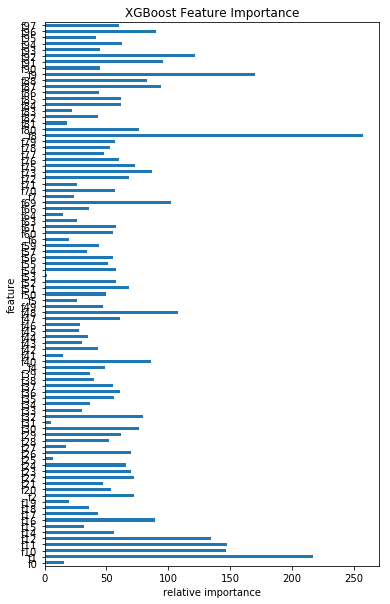

In [172]:
importance = bst.get_fscore()
importance = sorted(importance.items())

df = pd.DataFrame(importance, columns=['feature', 'fscore'])

df.plot(kind='barh', x='feature', y='fscore', legend=False, figsize=(6, 10))
plt.title('XGBoost Feature Importance')
plt.xlabel('relative importance')

## VII. Soumission

In [125]:
import csv

def soumission(y_chap,nom_du_fichier):
    
    pred=list()
    pred.append(['TARGET'])
    for i in range(0,len(y_chap)):
        pred.append([y_chap[i]])
    pred=np.asarray(pred)
    
    with open(nom_du_fichier, 'w', newline='') as fp:
        a=csv.writer(fp, delimiter=' ')
        a.writerows(pred)

In [126]:
soumission(prediction_moyenne,'xgbtotal')